# Apple Stock price from 1980 to 2022

Apple annual revenue history and growth rate from 1980 to 2000. Revenue can be defined as the amount of money a company receives from its customes in exchange for the sales of goods or services. The dataset contains data of revenue generated by apple company downloaded from kaggle. 

Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.

#### This file helps to explore data of Apple's stocks, and this data has some functions which are given below:-
* Specified time or date.
* Price of stock at time of opening for that day.
* Highest value reached by stock at particular day.
* Lowest value reached by stock at particular day.
* Final price of stock at closing time of stock exchange.
* The quantity(volume) of shares.

## Downloading the Dataset

There are several ways through which we can download the datasets from particular website such as by urlretrieve library or manually downloading the file but the most commonly used method to download file dataset is opendatasets library and that we are going to use.

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
dataset_url =  'https://www.kaggle.com/datasets/meerashareef/apple-revenue-from-1980-to-2022?resource=download'

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jappreetsingh004
Your Kaggle Key: ········


100%|██████████| 174k/174k [00:00<00:00, 66.7MB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = 'apple-revenue-from-1980-to-2022'

In [6]:
import os
os.listdir(data_dir)

['applerevenue .csv']

## Data Preparation and Cleaning

In this section we will first read the csv file by Pandas for better tabular visualization then we take out columns from the pandas data frame and then limit our field of analysis to certain range of data provided.



In [11]:
import pandas as pd
from pandas import DataFrame as df

In [12]:
revenue_raw_df = pd.read_csv('apple-revenue-from-1980-to-2022/applerevenue .csv')

In [13]:
revenue_raw_df

,date,open,high,low,close,volume,profit or not
0,12-12-1980,0.1003,0.1007,0.1003,0.1003,469033600,0
1,15-12-1980,0.0955,0.0955,0.0951,0.0951,175884800,1
2,16-12-1980,0.0885,0.0885,0.0881,0.0881,105728000,1
3,17-12-1980,0.0902,0.0907,0.0902,0.0902,86441600,0
4,18-12-1980,0.0929,0.0933,0.0929,0.0929,73449600,0
...,...,...,...,...,...,...,...
10554,24-10-2022,147.1850,150.2300,146.0000,149.4500,75569074,0
10555,25-10-2022,150.0900,152.4900,149.3600,152.3400,73583421,0
10556,26-10-2022,150.9600,151.9900,148.0400,149.3500,87769611,1
10557,27-10-2022,148.0700,149.0460,144.1300,144.8000,108110875,1


As from above it is clear we have converted our csv file into pandas dataframe.

In [14]:
revenue_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10559 entries, 0 to 10558
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10559 non-null  object 
 1   open           10559 non-null  float64
 2   high           10559 non-null  float64
 3   low            10559 non-null  float64
 4   close          10559 non-null  float64
 5   volume         10559 non-null  int64  
 6   profit or not  10559 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 577.6+ KB


Hence, there is not a single value from any column which is not null. Therefore, we don't have to do any modification.

In [15]:
revenue_raw_df.describe()

,open,high,low,close,volume,profit or not
count,10559.000000,10559.000000,10559.000000,10559.000000,1.055900e+04,10559.000000
mean,15.308827,15.483090,15.139373,15.318012,3.263275e+08,0.476466
std,33.973113,34.385796,33.580974,34.000790,3.201156e+08,0.499469
min,0.038800,0.038800,0.038400,0.038400,1.001504e+06,0.000000
25%,0.236800,0.242500,0.231650,0.236900,1.219792e+08,0.000000
50%,0.400200,0.406600,0.393000,0.399300,2.159780e+08,0.000000
75%,13.652700,13.783300,13.504000,13.647150,4.074518e+08,1.000000
max,181.877900,182.186600,178.382400,181.260500,2.147484e+09,1.000000


Now, we are going to get list of columns form the dataframes to dive deeply into the data.

In [16]:
revenue_raw_df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'profit or not'], dtype='object')

Due to the limited number of columns we can use all the columns to get some valuable information.

In [17]:
revenue_raw_df.rename(columns = {"profit or not":"profit_or_not"}, inplace = True)

Let's now convert the date column from type object to datetime column of pandas to get better outcome from it.

In [18]:
revenue_raw_df['date'] = pd.to_datetime(revenue_raw_df.date)

Now, we will add columns of year and month to get better knowledge about revenue generation in year and month.

In [19]:
revenue_raw_df['year'] = pd.DatetimeIndex(revenue_raw_df.date).year
revenue_raw_df['month'] = pd.DatetimeIndex(revenue_raw_df.date).month

Lets's check the dataframe how it look now and in further steps we will try to get some valuable information.

In [20]:
revenue_raw_df

,date,open,high,low,close,volume,profit_or_not,year,month
0,1980-12-12,0.1003,0.1007,0.1003,0.1003,469033600,0,1980,12
1,1980-12-15,0.0955,0.0955,0.0951,0.0951,175884800,1,1980,12
2,1980-12-16,0.0885,0.0885,0.0881,0.0881,105728000,1,1980,12
3,1980-12-17,0.0902,0.0907,0.0902,0.0902,86441600,0,1980,12
4,1980-12-18,0.0929,0.0933,0.0929,0.0929,73449600,0,1980,12
...,...,...,...,...,...,...,...,...,...
10554,2022-10-24,147.1850,150.2300,146.0000,149.4500,75569074,0,2022,10
10555,2022-10-25,150.0900,152.4900,149.3600,152.3400,73583421,0,2022,10
10556,2022-10-26,150.9600,151.9900,148.0400,149.3500,87769611,1,2022,10
10557,2022-10-27,148.0700,149.0460,144.1300,144.8000,108110875,1,2022,10


## Exploratory Analysis and Visualization

Now, to get valuable information from the dataset, we first have to understand how the different variables have affeted the revenue or how the changes have came into the revenue by time.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Now, to get some visual information of opening value of stock in year we will first find the mean of values in each year to get clean visualization.

In [24]:
revenue_grouped_df = pd.DataFrame(revenue_raw_df.groupby('year')[['open','close']].mean())
revenue_grouped_df.head(5)

,open,close
year,,
1980,0.106331,0.106200
1981,0.085063,0.084803
1982,0.066766,0.066778
1983,0.130900,0.130890
1984,0.093726,0.093491


Now, we will draw a line graph to get visulisation.

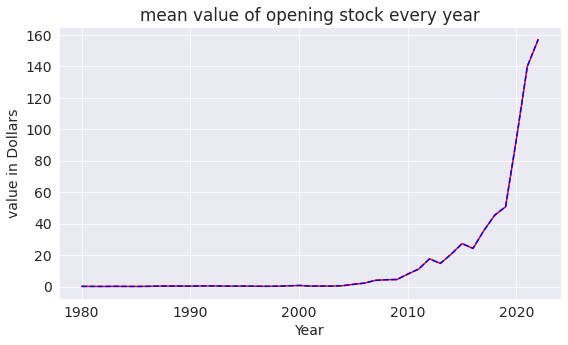

In [25]:
plt.plot(revenue_grouped_df.open, '-r')
plt.plot(revenue_grouped_df.close,'--b')
plt.title('mean value of opening stock every year')
plt.xlabel('Year')
plt.ylabel('value in Dollars');

As we can see that there is increase in price of stocks opening since every year but was uniform from 1980 to 2010. And the open and close value remain concurrent on each other which shows as about the stableness of company.

Now, we will look at the the profit and loss in form of pie chart to get the easy visualization, did profit outweighs loss or not?

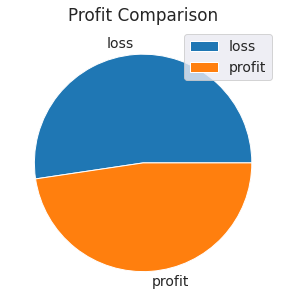

In [26]:
profit_df = revenue_raw_df.profit_or_not.value_counts()
# pie chart below
plt.pie(profit_df, labels = ['loss', 'profit'])
plt.title('Profit Comparison')
plt.legend();

Even though, profit is not in much majority but in spite, it is one of the most trusted company in stock exchange market.

Now, let's have look over volume of stocks to get clarity weather volume is the reason for less profit or not.

In [27]:
volume_df = pd.DataFrame(revenue_raw_df.groupby('year')['volume'].mean())
volume_df.head(5)

,volume
year,
1980,1.034501e+08
1981,3.252756e+07
1982,8.444667e+07
1983,1.653995e+08
1984,1.659250e+08


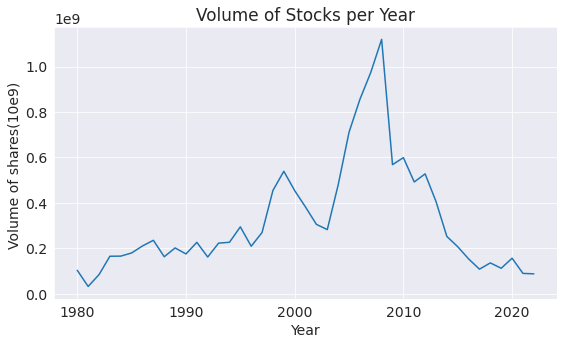

In [28]:
plt.plot(volume_df.volume)
plt.title('Volume of Stocks per Year')
plt.xlabel('Year')
plt.ylabel('Volume of shares(10e9) ');

Here, we can witness that there is an upward trend from 1980 to 2000 but afterward a small dip there's sudden rise in volume of stocks which explains why the price of stocks increased uniformly.

Let's now take a look over opening and closing value of shares in year having highest volume.

In [29]:
volume_df

,volume
year,
1980,1.034501e+08
1981,3.252756e+07
1982,8.444667e+07
1983,1.653995e+08
1984,1.659250e+08
1985,1.798153e+08
1986,2.107637e+08
1987,2.355729e+08
1988,1.632134e+08


And we have find that max volume is in the year of 2008.

In [30]:
revenue_raw_2008 = revenue_raw_df[revenue_raw_df.year == 2008]
revenue_raw_2008

,date,open,high,low,close,volume,profit_or_not,year,month
6825,2008-02-01,6.0758,6.1060,5.8709,5.9407,1079178800,1,2008,2
6826,2008-03-01,5.9581,6.0185,5.8752,5.9435,842066400,1,2008,3
6827,2008-04-01,5.8374,5.8846,5.4544,5.4898,1455832000,1,2008,4
6828,2008-07-01,5.5264,5.5980,5.1904,5.4163,2072193200,1,2008,7
6829,2008-08-01,5.4925,5.5633,5.2078,5.2215,1523816000,1,2008,8
...,...,...,...,...,...,...,...,...,...
7073,2008-12-24,2.6264,2.6298,2.5780,2.5929,271334000,1,2008,12
7074,2008-12-26,2.6417,2.6655,2.5990,2.6164,308324800,1,2008,12
7075,2008-12-29,2.6380,2.6716,2.5938,2.6408,686000000,0,2008,12
7076,2008-12-30,2.6655,2.6847,2.5831,2.6310,967601600,1,2008,12


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


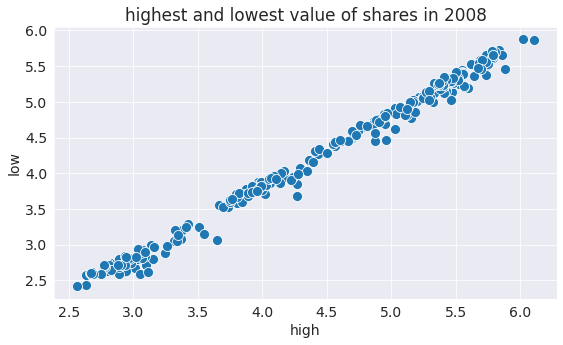

In [31]:
plt.title("highest and lowest value of shares in 2008")
sns.scatterplot(revenue_raw_2008.high, revenue_raw_2008.low, s = 100);

As we can see there's uniform increase in the highest and lowest value of shares inspite of the increased volume of shares in that year which shows the demand and value of the company.

## Asking and Answering Questions

On the basis of above data we can now get the answer of some very interesting questions. And some of them are given below for better understanding of data.

#### Q1: Which year accounted for  most profit than other years?

In [88]:
profit_year = pd.DataFrame(revenue_raw_df.groupby('year')['profit_or_not'].sum())
profit_year.head(10)

,profit_or_not
year,
1980,4
1981,121
1982,107
1983,122
1984,122
1985,112
1986,113
1987,111
1988,115


In [35]:
profit_year.max()

profit_or_not    146
dtype: int64

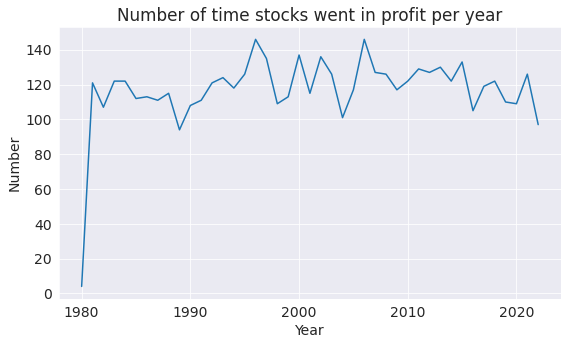

In [54]:
plt.plot(profit_year.profit_or_not)
plt.title('Number of time stocks went in profit per year')
plt.xlabel('Year')
plt.ylabel('Number');

It is clear that most number of profits in the a year is 146 which i have found in the year of 2006 and 1996. It is clear from line chart that there are two max points and by .max()function, I have find the maximum times the company got profit in particular year. That means that was the most profitable year for apple.

#### Q2: Which year has the most non-profit record?

To find this we can simply find the number of least profit in a certain year.

In [36]:
profit_year.min()

profit_or_not    4
dtype: int64

Least no-profit record was of 4 in the year of 1980. And it is more clear from the below chart the least time company got profit was in its starting years which is common in every startup.

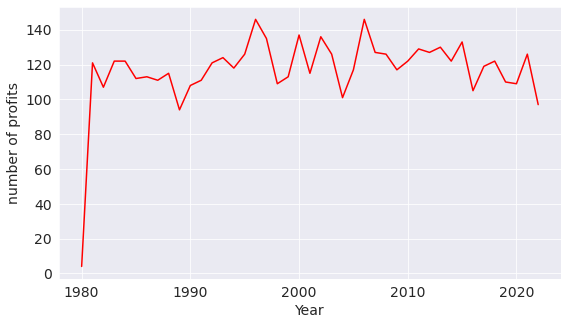

In [37]:
plt.plot(profit_year.profit_or_not,'-r')
plt.xlabel('Year')
plt.ylabel('number of profits');

#### Q3: Which month has accounted for maximum volume in 2008(max. volume recorded in year)? And also show volume in data frame in each month of that particular year?

In [38]:
revenue_2008 = pd.DataFrame(revenue_raw_2008.groupby('month')['volume'].sum())
revenue_2008

,volume
month,
1,28719806588
2,22561383600
3,22439184447
4,23139418400
5,19105660000
6,19447528800
7,25070617600
8,18128976447
9,25729237647


In [39]:
revenue_2008.max()

volume    36650802541
dtype: int64

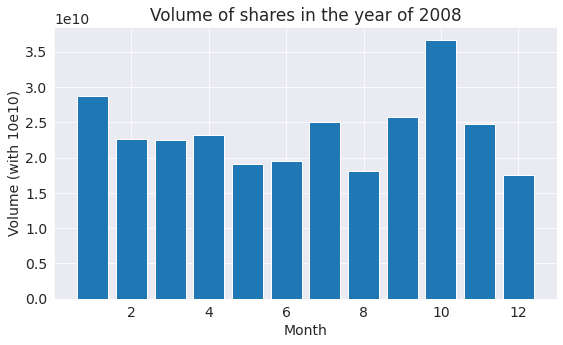

In [66]:
months = range(1,13)
plt.title("Volume of shares in the year of 2008")
plt.bar(months, revenue_2008.volume)
plt.xlabel('Month')
plt.ylabel('Volume (with 10e10)');

And this value of the volume is found in the month of October when apple generally launches their new products for sale.
It is more clear through bar graph that in the month of October volume increased unexpectedly.

#### Q4: Can we predict the future of stock value for apple?

In [70]:
revenue_raw_df.corr()

,open,high,low,close,volume,profit_or_not,year,month
open,1.000000,0.999941,0.999926,0.999844,-0.219316,-0.000861,0.636572,0.008843
high,0.999941,1.000000,0.999913,0.999926,-0.218785,-0.003254,0.636153,0.008643
low,0.999926,0.999913,1.000000,0.999928,-0.220155,-0.003508,0.636926,0.009024
close,0.999844,0.999926,0.999928,1.000000,-0.219485,-0.006072,0.636511,0.008734
volume,-0.219316,-0.218785,-0.220155,-0.219485,1.000000,0.019101,0.163035,-0.034519
profit_or_not,-0.000861,-0.003254,-0.003508,-0.006072,0.019101,1.000000,0.018390,0.002429
year,0.636572,0.636153,0.636926,0.636511,0.163035,0.018390,1.000000,-0.006471
month,0.008843,0.008643,0.009024,0.008734,-0.034519,0.002429,-0.006471,1.000000


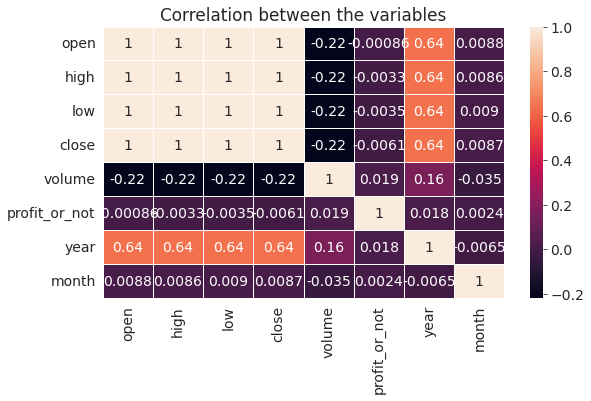

In [79]:
sns.heatmap(revenue_raw_df.corr(), linewidths = 1, annot = True)
plt.title('Correlation between the variables');

From the heatmap we can clearly visualize the correlation between the variables or columns. And from there we can witness that profit_or_not is not depended on any of the other column. Hence, it is clear that we cannot predict future because value of correlation for profit_or_not is close to 0 with other variables.

### Q5 : Around what density volume remained throughout the given time dataset.

In [81]:
volume_df.head(10)

,volume
year,
1980,1.034501e+08
1981,3.252756e+07
1982,8.444667e+07
1983,1.653995e+08
1984,1.659250e+08
1985,1.798153e+08
1986,2.107637e+08
1987,2.355729e+08
1988,1.632134e+08


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


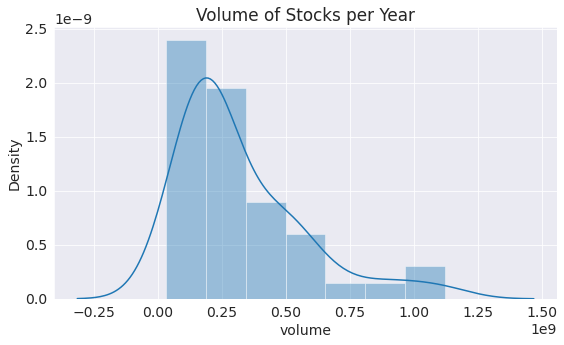

In [85]:
sns.distplot(volume_df.volume)
plt.title('Volume of Stocks per Year');

From the above histogram we can clearly know that the density of volume of shares is most between 0.0 - 0.25 x 10e9, which means that density of shares remain that since 1980 to 2022.

Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

In the dataset in spite of limited number of columns, we can a lot valuable information after some data cleaning and sorting the data such as:
* Maximum price of stocks in particular year.
* Correlation between the profit and other factors.
* Minimum value of stocks in stock exchange.
* Density of volume that remained most trough out the given time in data set.
* Month in which price of stocks almost remain highest. This also helps to know the popularity of the specific product of company.
* The data shows the stability of the stocks and also prove to be safe share to invest due to oldness of the company.

## References and Future Work

Check out the following resources to know more about the dataset and tools used in this notebook:
* Apple revenue data: https://www.kaggle.com/datasets/meerashareef/apple-revenue-from-1980-to-2022?resource=download

* Pandas user guide:
https://pandas.pydata.org/docs/user_guide/index.html

* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

* opendatasets Python library: https://github.com/JovianML/opendatasets